# IDENTIFYING FREQUENTLY PURCHASED GROCERIES WITH ASSOCIATION RULES

Rosa Karina Torres Calderon

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from numpy import count_nonzero
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend as ml
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Step 1- Reading the data set

In [2]:
grocery = pd.read_table("groceries3.csv", header = -1)
print(grocery.head(5))

grocery = grocery.values.tolist()

                                               0
0                    fruit,bread,margarine,soups
1                            fruit,yogurt,coffee
2                                           milk
3                       fruit,yogurt,cheese,meat
4  vegetables,milk,milk,long life bakery product


/Users/karinatorres/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


# Step 2- Exploring and preparing the data

42916


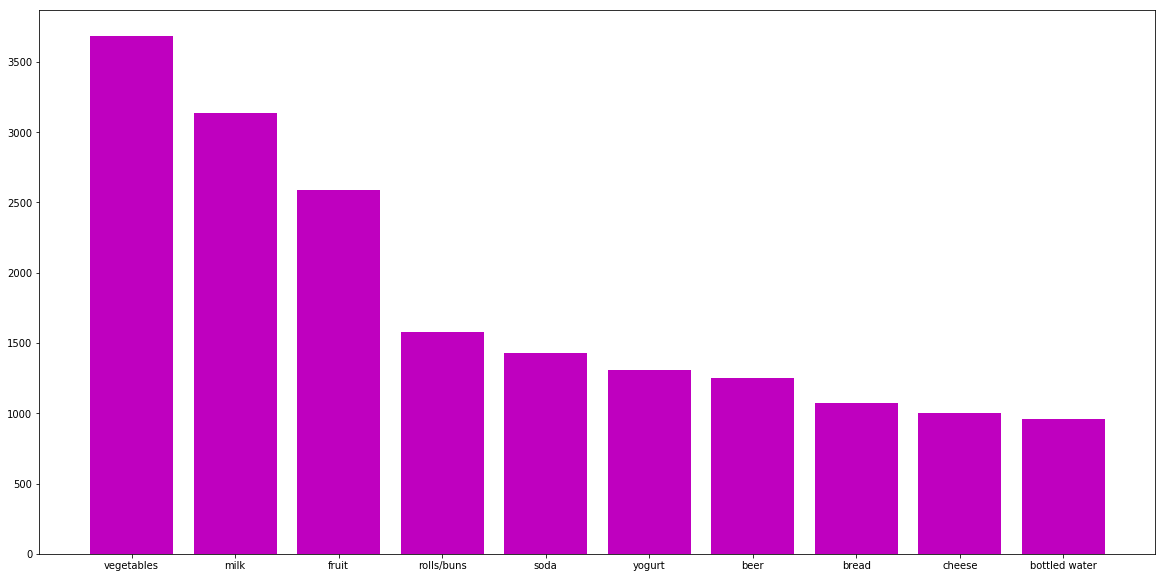

Número de elementos: 340

Top ten de los elementos más comprados:
{'vegetables': 3683, 'milk': 3135, 'fruit': 2589, 'rolls/buns': 1577, 'soda': 1431, 'yogurt': 1307, 'beer': 1252, 'bread': 1071, 'cheese': 1004, 'bottled water': 959}


In [8]:
compras = []
for i in range(0,len(grocery)):
    x = grocery[i][0].split(",")
    compras = x + compras
# len(grocery)
print(len(compras))

# Frequency of all elements in the basket
counts = Counter(compras)
# print(counts)

# Top ten of the most purchased items
value = dict(sorted(counts.items(), key=operator.itemgetter(1), reverse=True)[:10])

#Visualization 
plt.figure(figsize=(20,10))
plt.bar(list(value.keys()), value.values(), color='m',align='center')
#plt.bar(list(counts.keys()), counts.values(), color='b')
plt.show()

print('Número de elementos: ' + str(len(counts)))
print('\nTop ten de los elementos más comprados:')
print(dict(sorted(counts.items(), key=operator.itemgetter(1), reverse=True)[:10]))

In [9]:
# Split all the words in the list
n_grocery = []
for i in range(0,len(grocery)):
    x = grocery[i][0].split(",")
    n_grocery.append(x)
print(n_grocery)

[['fruit', 'bread', 'margarine', 'soups'], ['fruit', 'yogurt', 'coffee'], ['milk'], ['fruit', 'yogurt', 'cheese', 'meat'], ['vegetables', 'milk', 'milk', 'long life bakery product'], ['milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['vegetables', 'milk', 'rolls/buns', 'beer', 'liquore'], ['pot plants'], ['milk', 'cereals '], ['fruit', 'vegetables', 'bread', 'bottled water', 'chocolate'], ['fruit', 'fruit', 'milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'fruit '], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['vegetables'], ['milk', 'pastry '], ['milk'], ['fruit', 'cheesecheese', 'detergent', 'newspapers'], ['fruit', 'vegetables', 'vegetables', 'dessert', 'rolls/buns', 'flour', 'sweet spreads', 'salty snack', 'waffles', 'candy', 'bathroom cleaner '], ['bottled water', 'be

Data preparation - creating a sparse matrix for transaction data

In [11]:
te = TransactionEncoder()
te_ary = te.fit(n_grocery).transform(n_grocery)
print(te_ary)
te_ary.astype("int")
#print(te.columns_) 

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Visualizing transaction data - plotting the sparse matrix

[[]]

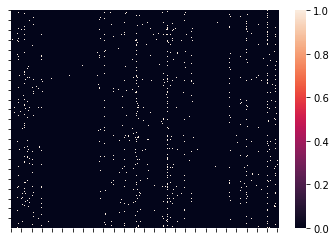

In [12]:
# Visualization of the abscence/prescence matrix
ax = sns.heatmap(te_ary)
ax.set(xticklabels=[])
ax.set(yticklabels=[])


[[]]

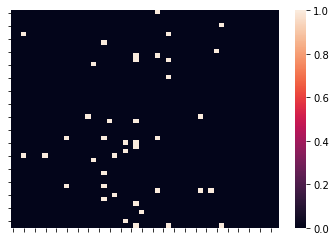

In [96]:
# Visualization of the abscence/prescence matrix (only 50 rows)
ax = sns.heatmap(te_ary[0:50,0:50])
ax.set(xticklabels=[])
ax.set(yticklabels=[])

In [14]:
# Sparsity of the matrix
sparsity = 1.0 - count_nonzero(te_ary)/te_ary.size
print('Sparsity de la matriz: ' + str(sparsity))

Sparsity de la matriz: 0.9877158407847124


In [16]:
# Item that was most commonly found in the transactional data
tedf = pd.DataFrame(te_ary, columns=te.columns_)
suma = tedf.sum(axis = 0)
print(suma[[suma.idxmax()]])

milk    2940
dtype: int64


# Step 3- Training a Model on the data

In [18]:
# Apriori algorithm
frequent_itemsets = apriori(tedf,min_support=0.01,use_colnames=True)
print(frequent_itemsets)

      support                                   itemsets
0    0.028775                              (animal food)
1    0.056634                                     (bags)
2    0.052872                                    (bags )
3    0.015963                            (baking powder)
4    0.052161                                     (beef)
5    0.125267                                     (beer)
6    0.030402                                    (beer )
7    0.033045                                  (berries)
8    0.047890                                (beverages)
9    0.097509                            (bottled water)
10   0.011693                           (bottled water )
11   0.101983                                    (bread)
12   0.011591                                   (bread )
13   0.054398                                   (butter)
14   0.010371                                 (cake bar)
15   0.020234                                    (candy)
16   0.090696                  

# Step 4- Evaluating model performance

In [21]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.08)
rules.sort_values('confidence', ascending = False, inplace = True)
print(rules.head(10))

                      antecedents   consequents  antecedent support  \
913                (milk, onions)  (vegetables)            0.014032   
1018        (milk, butter, fruit)  (vegetables)            0.013828   
566               (cheese, cream)  (vegetables)            0.013523   
428                  (milk, beef)  (vegetables)            0.022776   
1060         (milk, cream, fruit)  (vegetables)            0.016370   
631               (milk, chicken)  (vegetables)            0.019319   
668                (cream, fruit)  (vegetables)            0.025623   
422                 (beef, fruit)  (vegetables)            0.016472   
1019  (vegetables, butter, fruit)        (milk)            0.014642   
304                       (herbs)  (vegetables)            0.015963   

      consequent support   support  confidence      lift  leverage  conviction  
913             0.287443  0.010676    0.760870  2.647029  0.006643    2.979785  
1018            0.287443  0.010473    0.757353  2.634795

In [23]:
# Summary statistics for the quality measures
print(rules.describe())
# The lift is an indicator that a rule is important, and reflects a true connection between items

       antecedent support  consequent support      support   confidence  \
count         1128.000000         1128.000000  1128.000000  1128.000000   
mean             0.127583            0.127583     0.017235     0.237516   
std              0.097489            0.097489     0.010896     0.184672   
min              0.013523            0.013523     0.010066     0.033673   
25%              0.047382            0.047382     0.011490     0.085760   
50%              0.096187            0.096187     0.013726     0.178542   
75%              0.214540            0.214540     0.018810     0.364999   
max              0.298932            0.298932     0.131063     0.760870   

              lift     leverage   conviction  
count  1128.000000  1128.000000  1128.000000  
mean      1.940868     0.007356     1.204924  
std       0.519057     0.004604     0.283214  
min       0.745157    -0.009383     0.903468  
25%       1.570605     0.005162     1.034829  
50%       1.881392     0.006638     1.0883

Saving association rules to a file or data frame

In [24]:
# Saving the results to disk
rules.to_csv('basket_results.csv', sep=',', encoding='utf-8')

# Interesting rules
rules_interesting = rules[ (rules['lift'] >= 2) &
       (rules['confidence'] >= 0.7) ]

rules_interesting.to_csv('basket_results_top.csv', sep=',', encoding='utf-8')